In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка для лучшего отображения графиков
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Необходимые библиотеки импортированы.")

# --- 1. Загрузка данных ---
# Убедись, что путь к файлам корректен.
# Если ты поместил их прямо в корень папки репозитория:
try:
    df_transactions = pd.read_parquet('transaction_fraud_data.parquet')
    df_exchange_rates = pd.read_parquet('historical_currency_exchange.parquet')
    print("Данные успешно загружены.")
except FileNotFoundError:
    # Если ты поместил их в подпапку 'data/', раскомментируй следующие строки:
    # try:
    #     df_transactions = pd.read_parquet('data/transaction_fraud_data.parquet')
    #     df_exchange_rates = pd.read_parquet('data/historical_currency_exchange.parquet')
    #     print("Данные успешно загружены из папки 'data/'.")
    # except FileNotFoundError:
    print("Ошибка: Убедитесь, что файлы 'transaction_fraud_data.parquet' и 'historical_currency_exchange.parquet' находятся в той же директории, что и ваш скрипт/ноутбук, или в подпапке 'data/'.")
    # exit() # Закомментировано, чтобы ноутбук не останавливался при ошибке

# --- 2. Предварительный осмотр данных (первые шаги EDA) ---
if 'df_transactions' in locals() and 'df_exchange_rates' in locals():
    print("\n--- Общая информация о df_transactions ---")
    df_transactions.info()

    print("\n--- Первые 5 строк df_transactions ---")
    print(df_transactions.head())

    print("\n--- Описательная статистика для численных признаков df_transactions ---")
    print(df_transactions.describe())

    print("\n--- Проверка на пропущенные значения в df_transactions ---")
    print(df_transactions.isnull().sum()[df_transactions.isnull().sum() > 0]) # Выводим только колонки с пропусками

    print("\n--- Общая информация о df_exchange_rates ---")
    df_exchange_rates.info()

    print("\n--- Первые 5 строк df_exchange_rates ---")
    print(df_exchange_rates.head())

    # --- 3. Разворачивание вложенного поля last_hour_activity ---
    if 'last_hour_activity' in df_transactions.columns:
        print("\n--- Разворачивание вложенного поля 'last_hour_activity' ---")
        last_hour_activity_df = pd.json_normalize(df_transactions['last_hour_activity'])
        last_hour_activity_df.columns = [f"last_hour_activity_{col}" for col in last_hour_activity_df.columns]
        df_transactions = pd.concat([df_transactions.drop('last_hour_activity', axis=1), last_hour_activity_df], axis=1)
        print("Поле 'last_hour_activity' развернуто в отдельные колонки.")
        print(df_transactions.head())
        print(df_transactions.info())
    else:
        print("\nПоле 'last_hour_activity' уже развернуто или отсутствует.")

    # --- 4. Приведение типов данных и подготовка для мерджа ---
    # Преобразование 'timestamp' в datetime и извлечение даты
    df_transactions['timestamp'] = pd.to_datetime(df_transactions['timestamp'])
    df_transactions['date'] = df_transactions['timestamp'].dt.date
    # Преобразование 'date' в datetime в таблице курсов для корректного мерджа
    df_exchange_rates['date'] = pd.to_datetime(df_exchange_rates['date']).dt.date

    print("\n--- df_transactions после преобразования timestamp и разворачивания last_hour_activity ---")
    print(df_transactions.head())
    print(df_transactions.info())

    print("\n--- df_exchange_rates после преобразования даты ---")
    print(df_exchange_rates.head())
    print(df_exchange_rates.info())

    print("\nТеперь данные загружены, основные преобразования выполнены. Можно приступать к глубокому EDA!")

Необходимые библиотеки импортированы.
Данные успешно загружены.

--- Общая информация о df_transactions ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7483766 entries, 0 to 7483765
Data columns (total 23 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   transaction_id           object        
 1   customer_id              object        
 2   card_number              int64         
 3   timestamp                datetime64[us]
 4   vendor_category          object        
 5   vendor_type              object        
 6   vendor                   object        
 7   amount                   float64       
 8   currency                 object        
 9   country                  object        
 10  city                     object        
 11  city_size                object        
 12  card_type                object        
 13  is_card_present          bool          
 14  device                   object        
 15  channel  


--- Баланс классов 'is_fraud' ---
Количество мошеннических транзакций (True): 1494719
Количество легитимных транзакций (False): 5989047
Доля мошеннических транзакций: 19.9728%
Доля легитимных транзакций: 80.0272%


C:\Users\georg\AppData\Local\Temp\ipykernel_24840\523209583.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_fraud', data=df_transactions, palette='viridis')


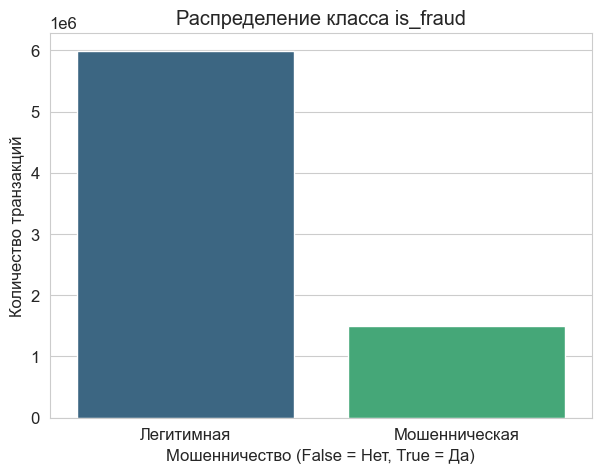


--- Анализ мошенничества по основным категориальным признакам ---

Анализ по признаку: vendor_category
Доля мошенничества по категориям:
vendor_category
Travel           0.200341
Grocery          0.200194
Gas              0.199731
Restaurant       0.199696
Entertainment    0.199632
Education        0.199459
Retail           0.199398
Healthcare       0.199376
Name: is_fraud, dtype: float64


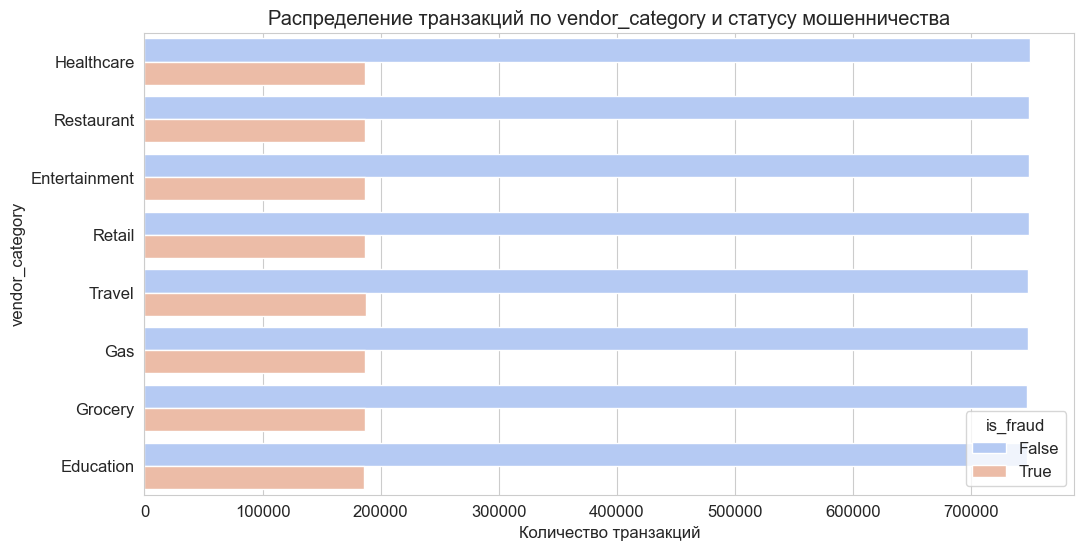

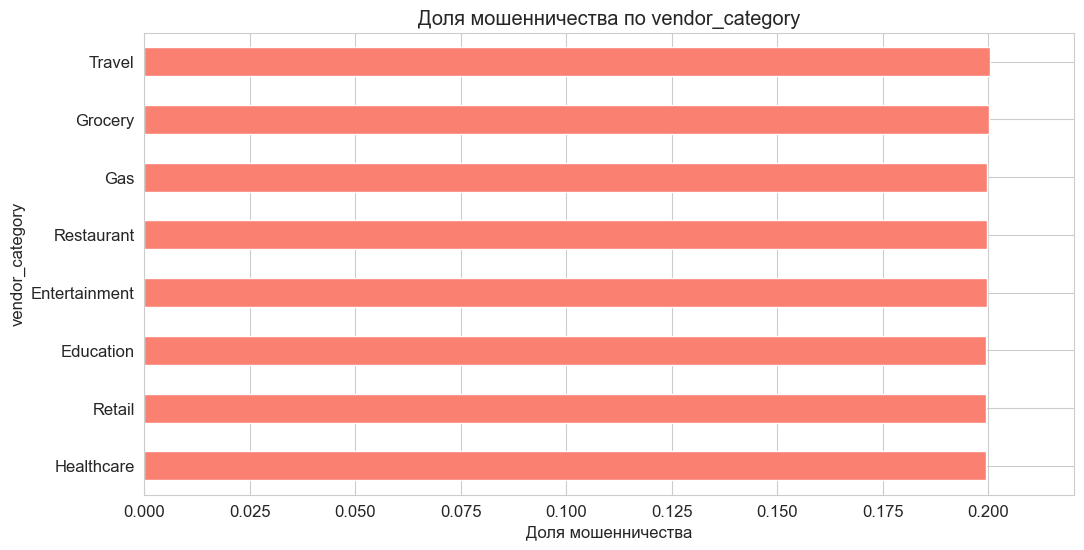


Анализ по признаку: vendor_type
Доля мошенничества по категориям:
vendor_type
transport    0.201169
fast_food    0.200719
airlines     0.200535
physical     0.200206
booking      0.200174
events       0.200017
major        0.199821
pharmacy     0.199773
supplies     0.199758
local        0.199642
gaming       0.199558
hotels       0.199487
streaming    0.199320
online       0.199310
casual       0.199186
premium      0.199179
medical      0.198978
Name: is_fraud, dtype: float64


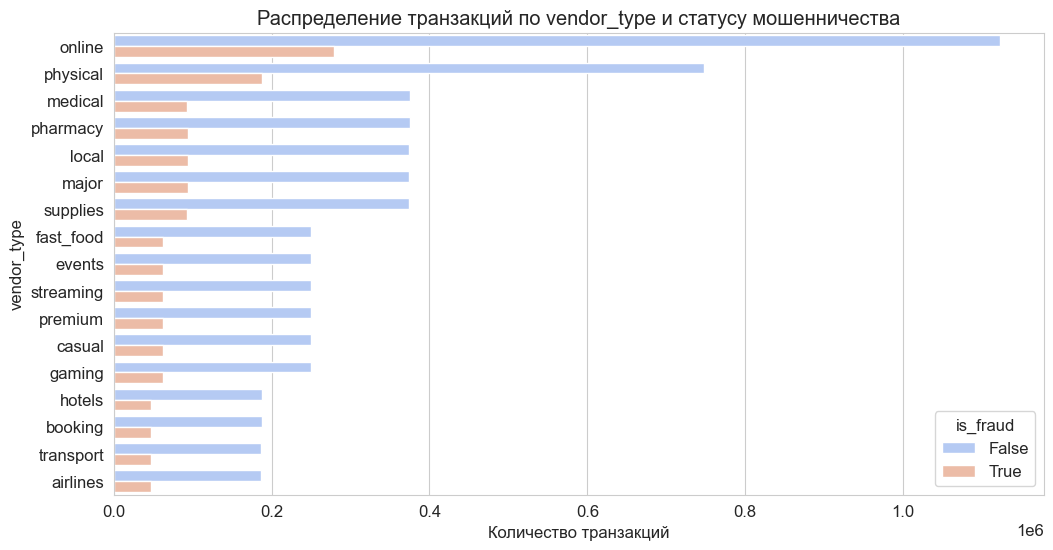

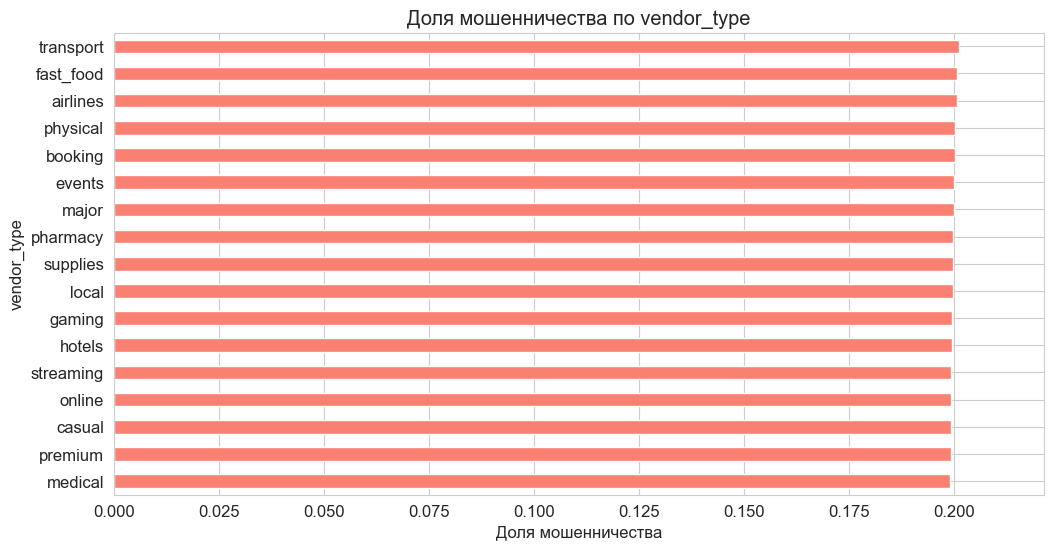


Анализ по признаку: currency
Доля мошенничества по категориям:
currency
MXN    0.380348
RUB    0.377238
BRL    0.371060
NGN    0.351360
AUD    0.075805
USD    0.074615
JPY    0.071279
EUR    0.070027
CAD    0.069988
GBP    0.069351
SGD    0.063557
Name: is_fraud, dtype: float64


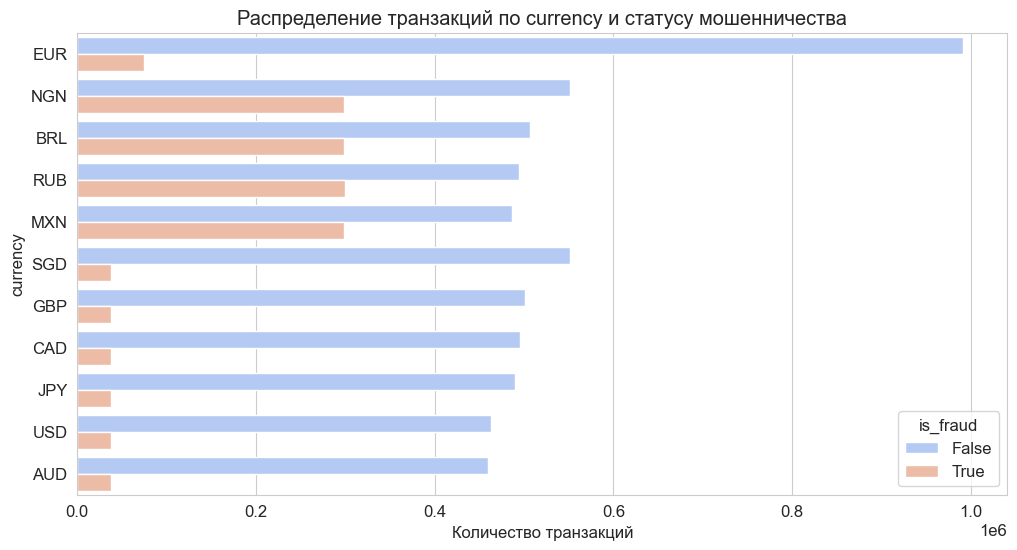

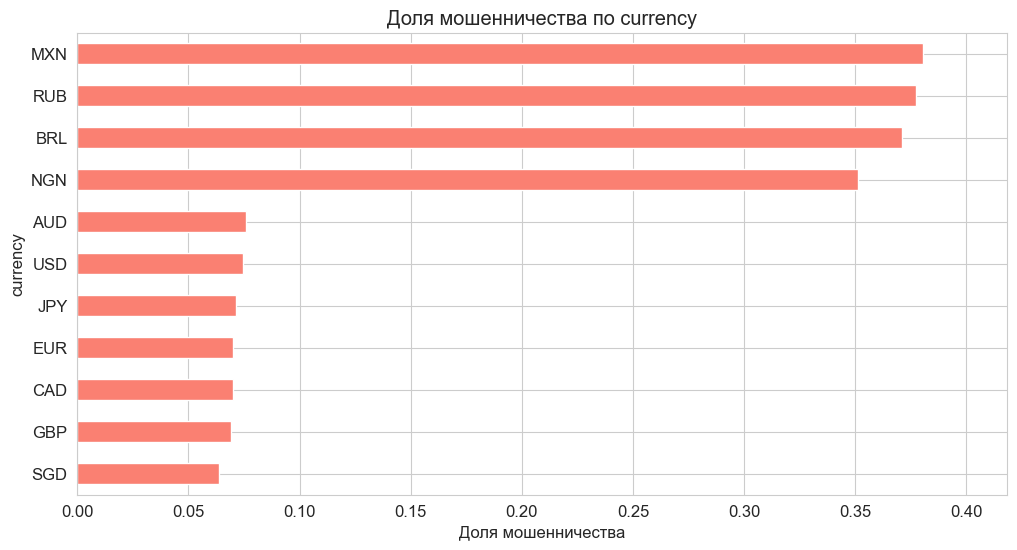


Анализ по признаку: country
Доля мошенничества по категориям:
country
Mexico       0.380348
Russia       0.377238
Brazil       0.371060
Nigeria      0.351360
Australia    0.075805
USA          0.074615
Japan        0.071279
Germany      0.070939
Canada       0.069988
UK           0.069351
France       0.069143
Singapore    0.063557
Name: is_fraud, dtype: float64


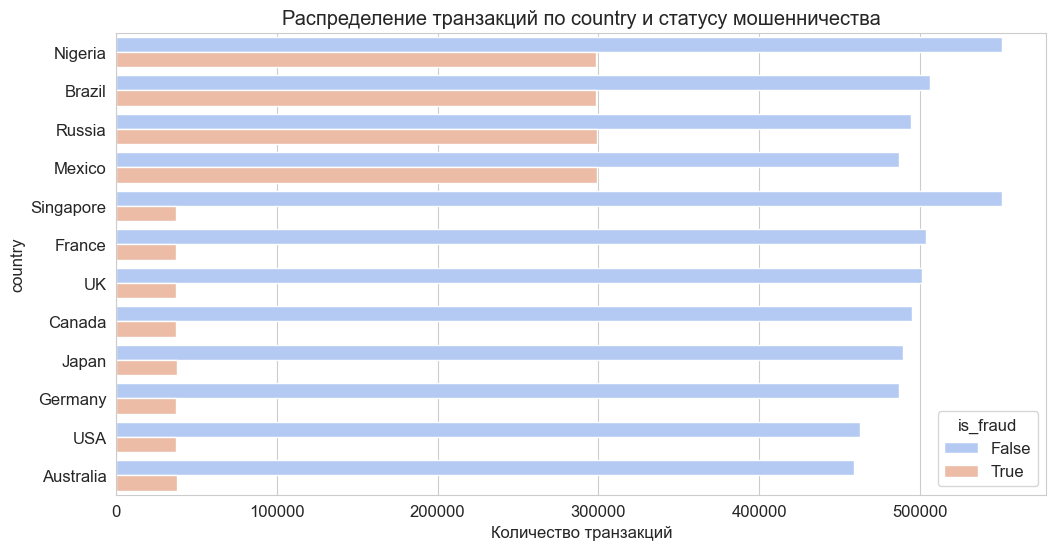

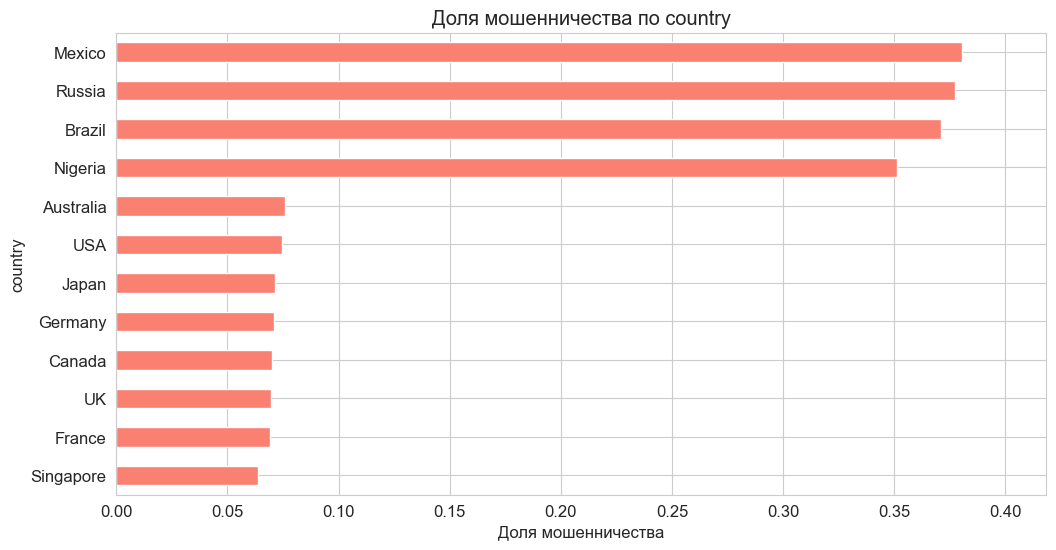


Анализ по признаку: city_size
Доля мошенничества по категориям:
city_size
medium    0.203150
large     0.074585
Name: is_fraud, dtype: float64


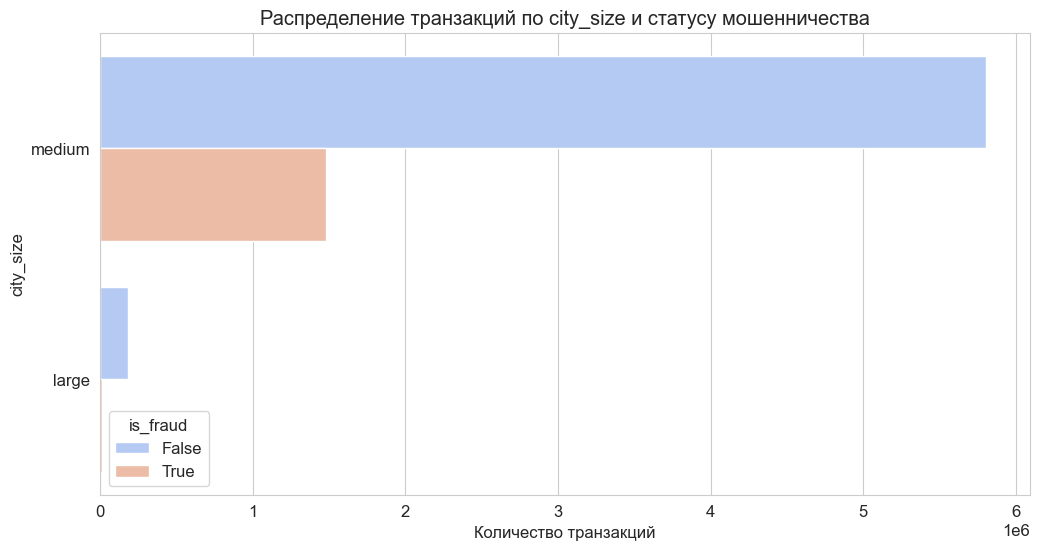

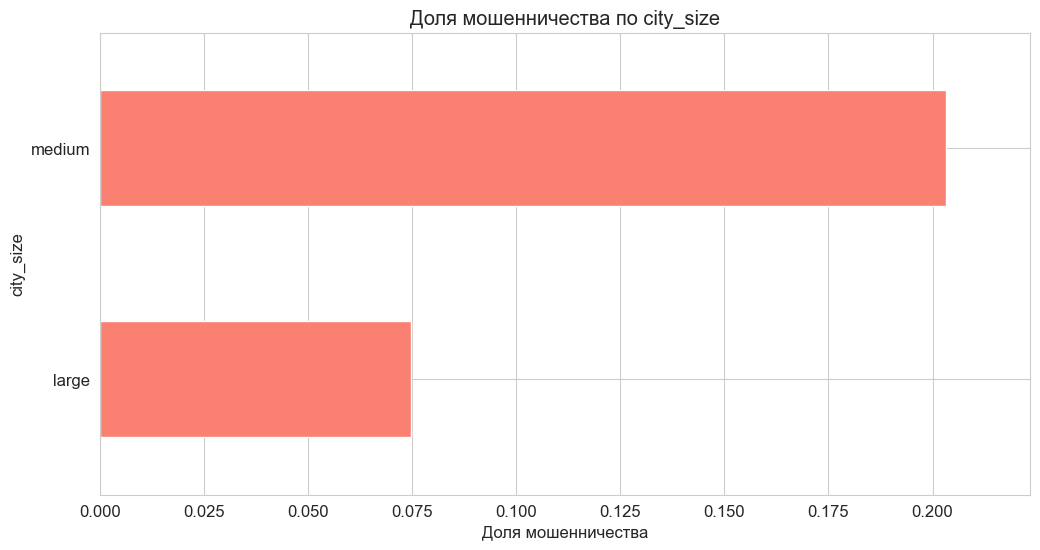


Анализ по признаку: card_type
Доля мошенничества по категориям:
card_type
Basic Credit       0.199742
Platinum Credit    0.199731
Gold Credit        0.199729
Premium Debit      0.199721
Basic Debit        0.199720
Name: is_fraud, dtype: float64


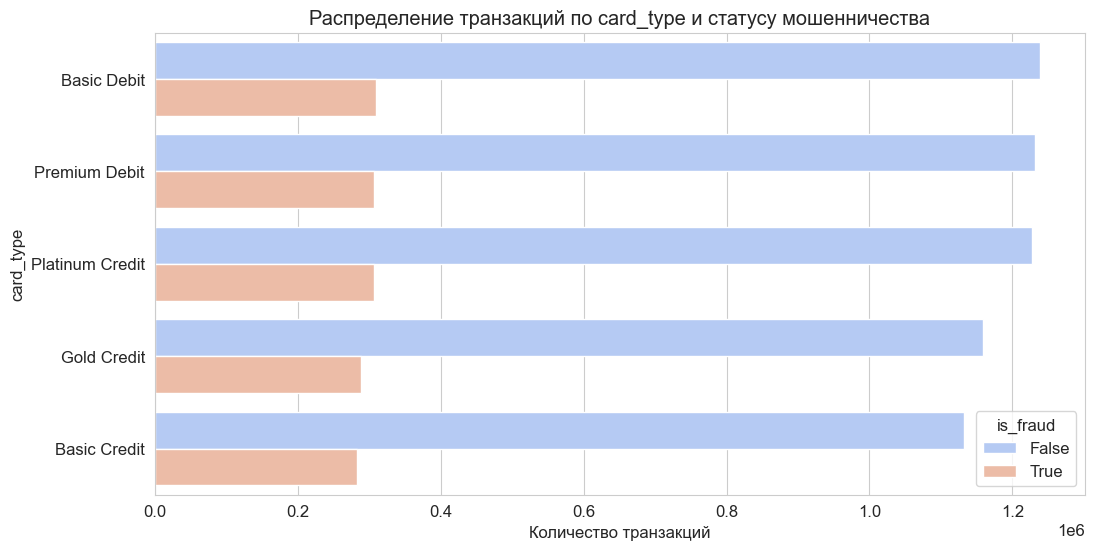

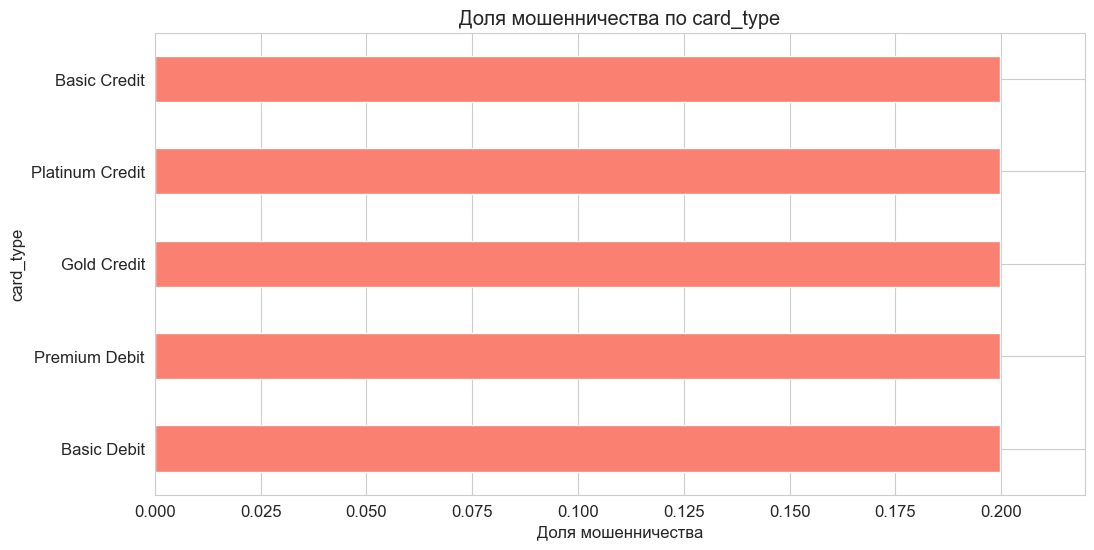


Анализ по признаку: device
Доля мошенничества по категориям:
device
Chip Reader        1.000000
NFC Payment        1.000000
Magnetic Stripe    1.000000
Firefox            0.126831
Safari             0.126204
Android App        0.125070
Chrome             0.123710
iOS App            0.122703
Edge               0.116753
Name: is_fraud, dtype: float64


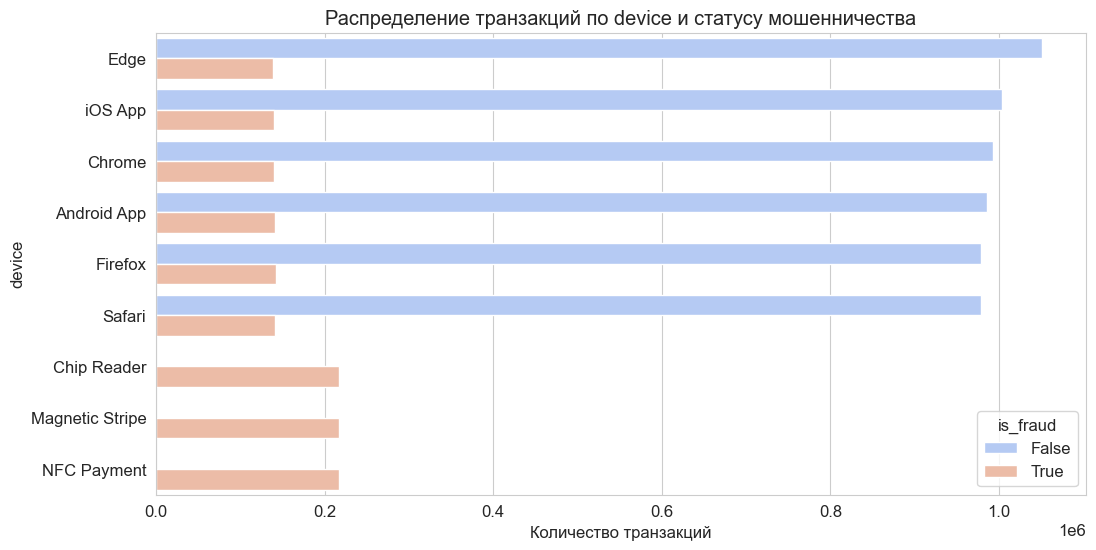

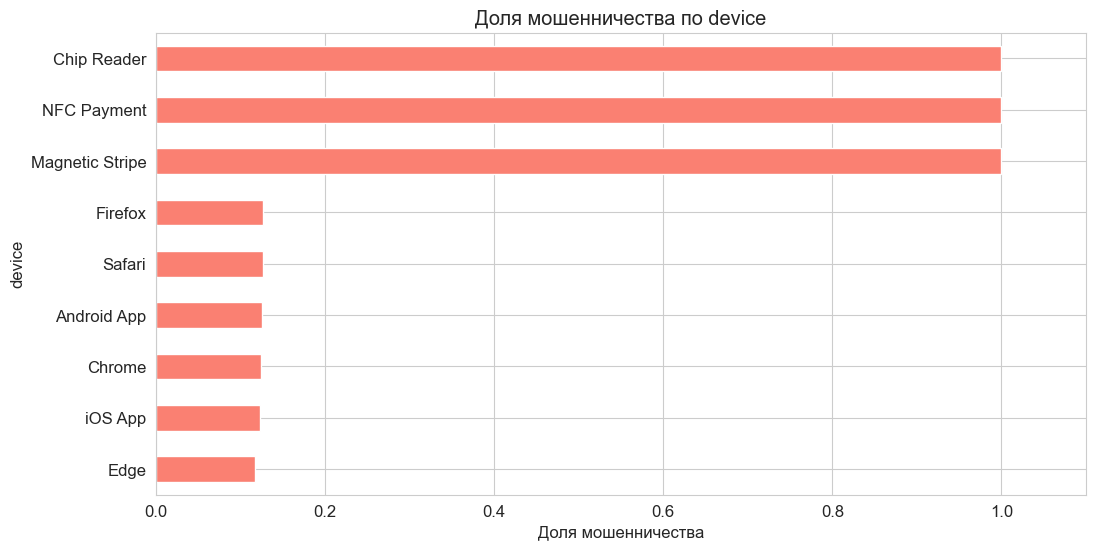


Анализ по признаку: channel
Доля мошенничества по категориям:
channel
pos       1.000000
mobile    0.123878
web       0.123275
Name: is_fraud, dtype: float64


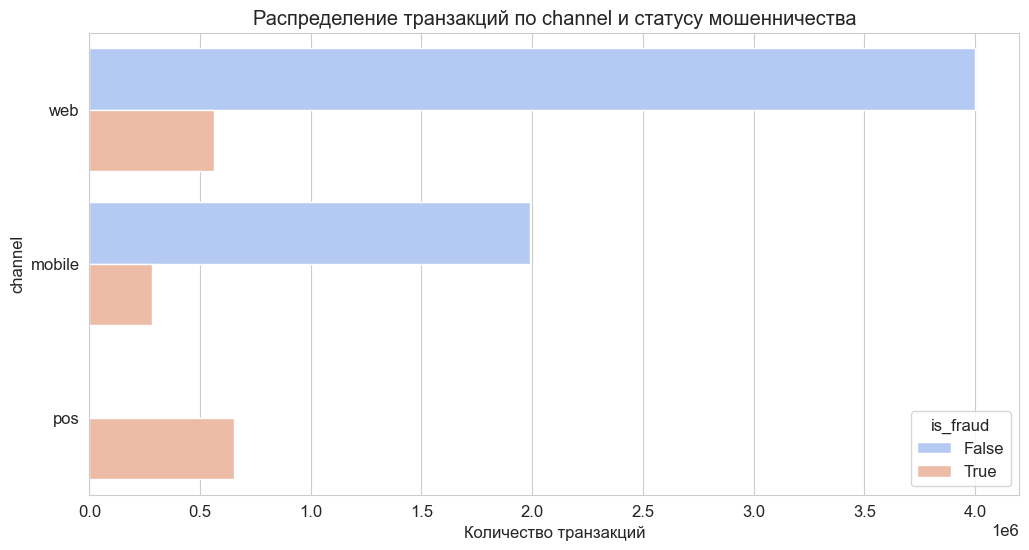

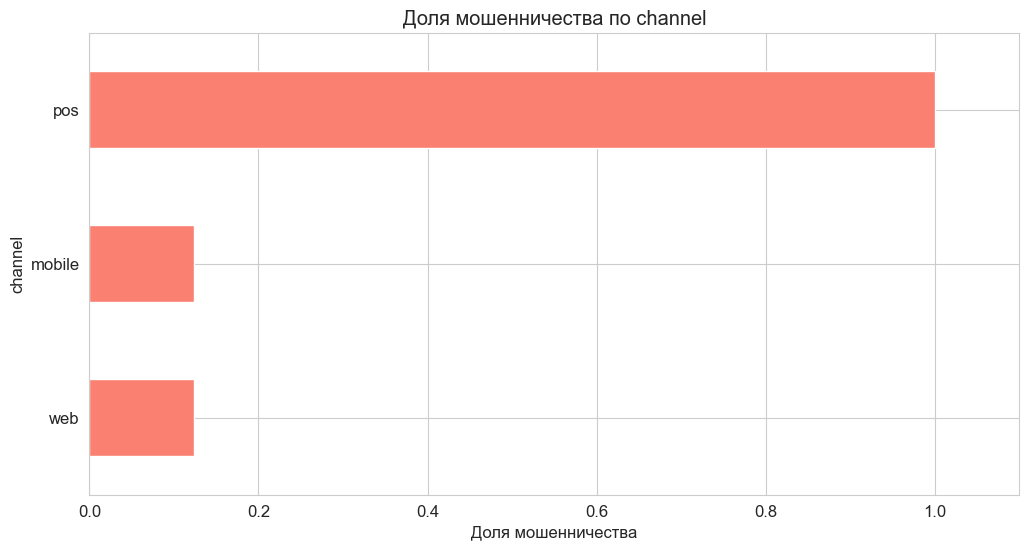


Анализ по признаку: is_card_present
Доля мошенничества по категориям:
is_card_present
True     1.000000
False    0.123475
Name: is_fraud, dtype: float64


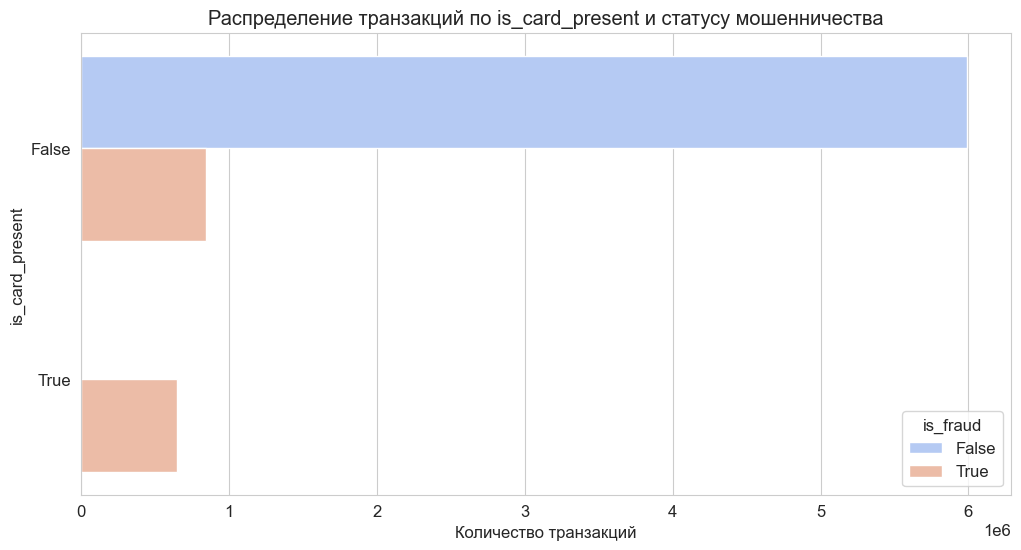

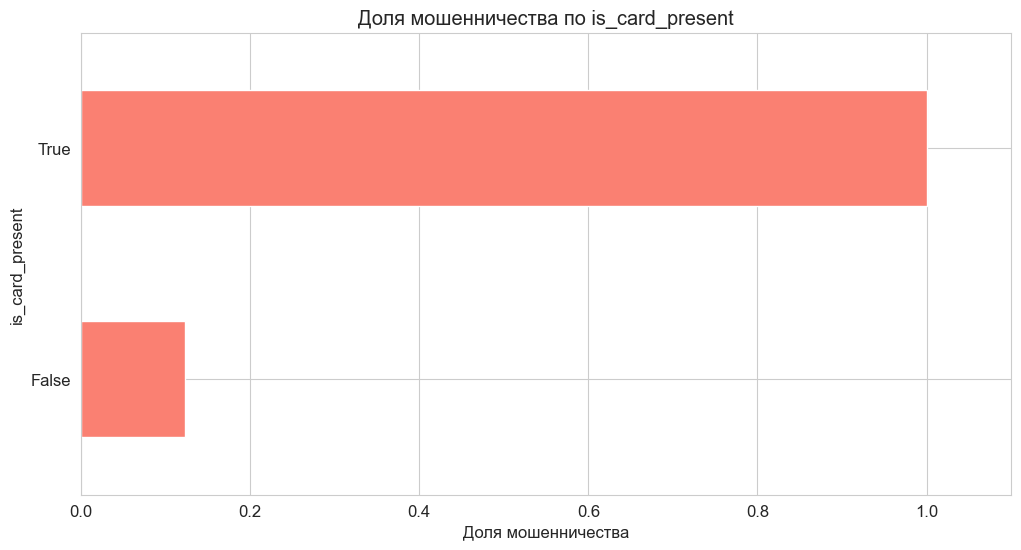


Анализ по признаку: is_outside_home_country
Доля мошенничества по категориям:
is_outside_home_country
True     0.567753
False    0.024902
Name: is_fraud, dtype: float64


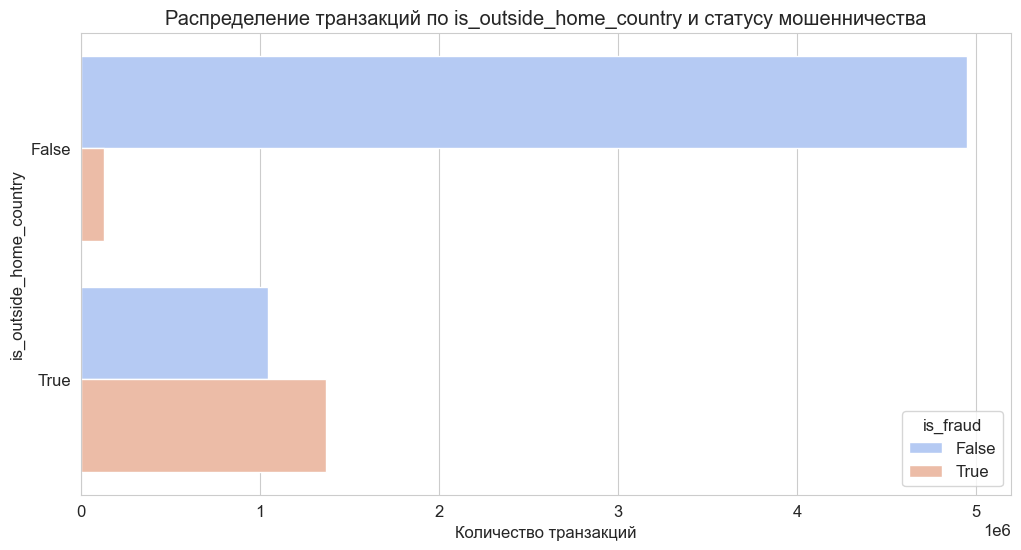

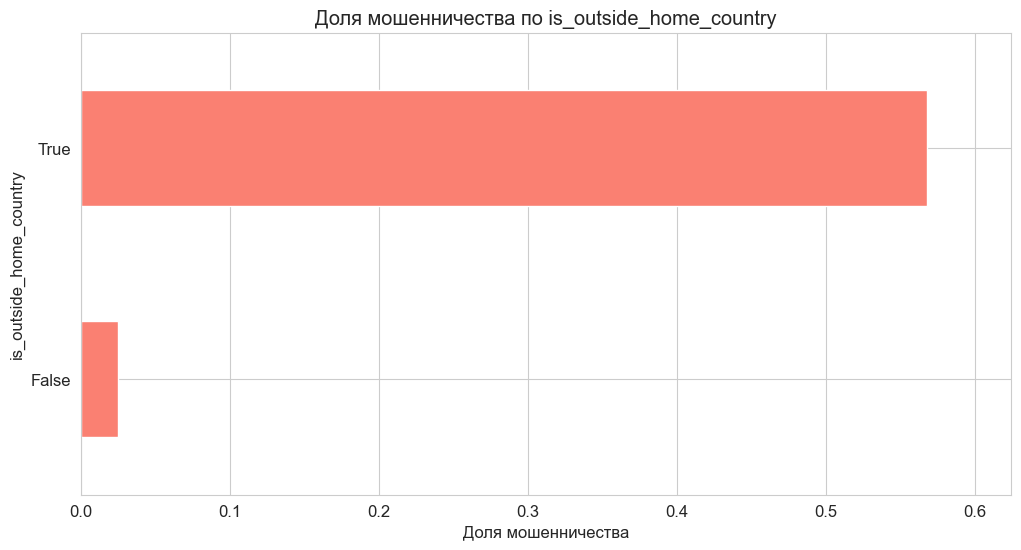


Анализ по признаку: is_high_risk_vendor
Доля мошенничества по категориям:
is_high_risk_vendor
True     0.199986
False    0.199642
Name: is_fraud, dtype: float64


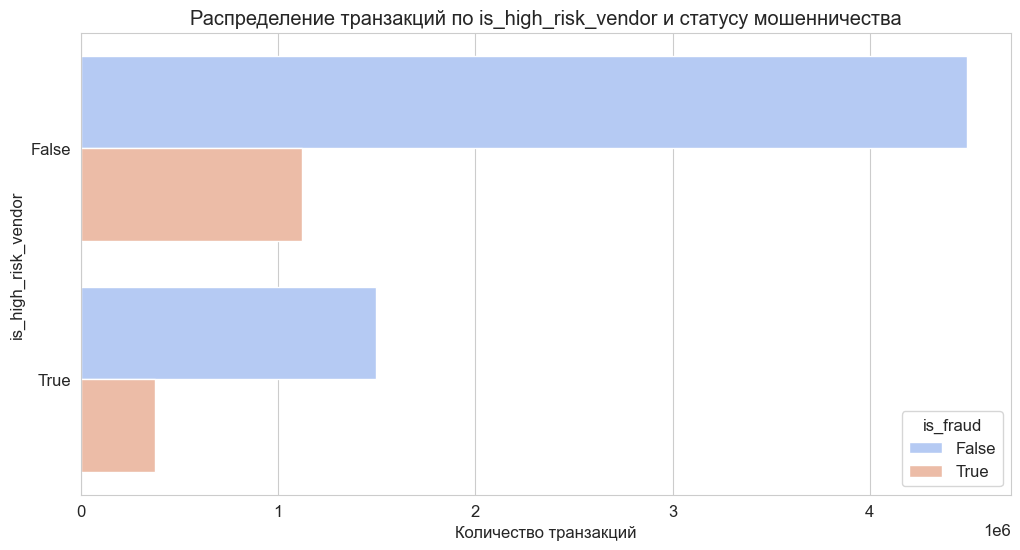

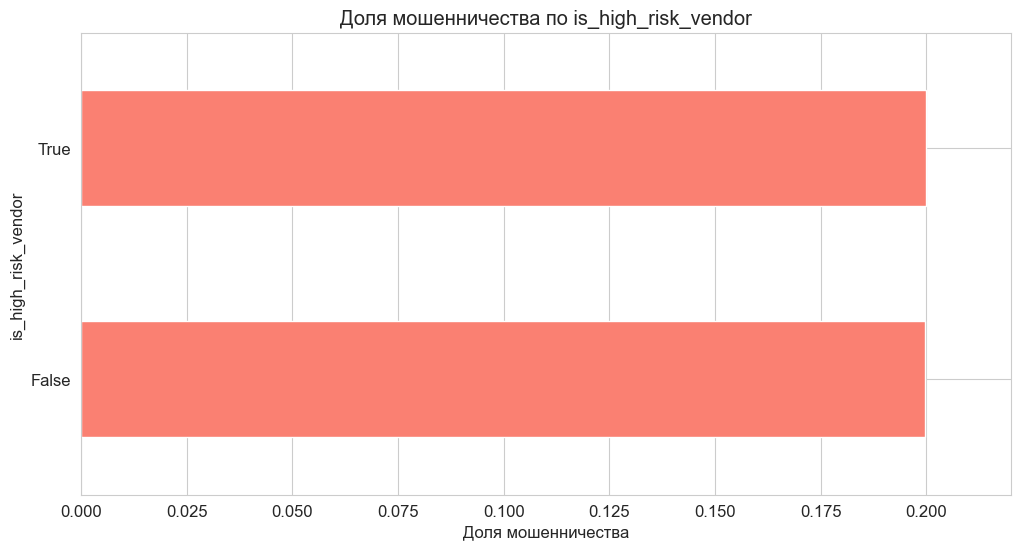


Анализ по признаку: is_weekend
Доля мошенничества по категориям:
is_weekend
True     0.199746
False    0.199722
Name: is_fraud, dtype: float64


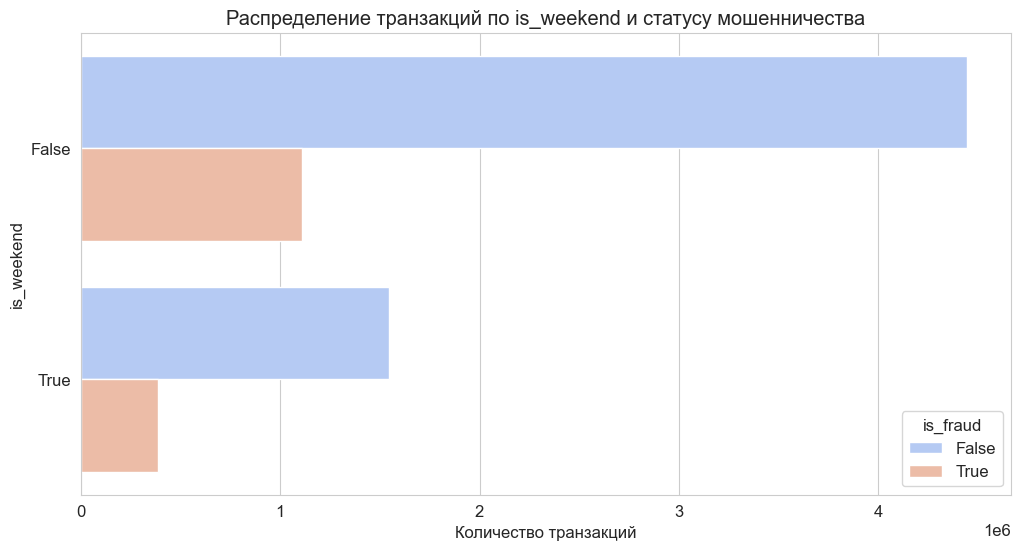

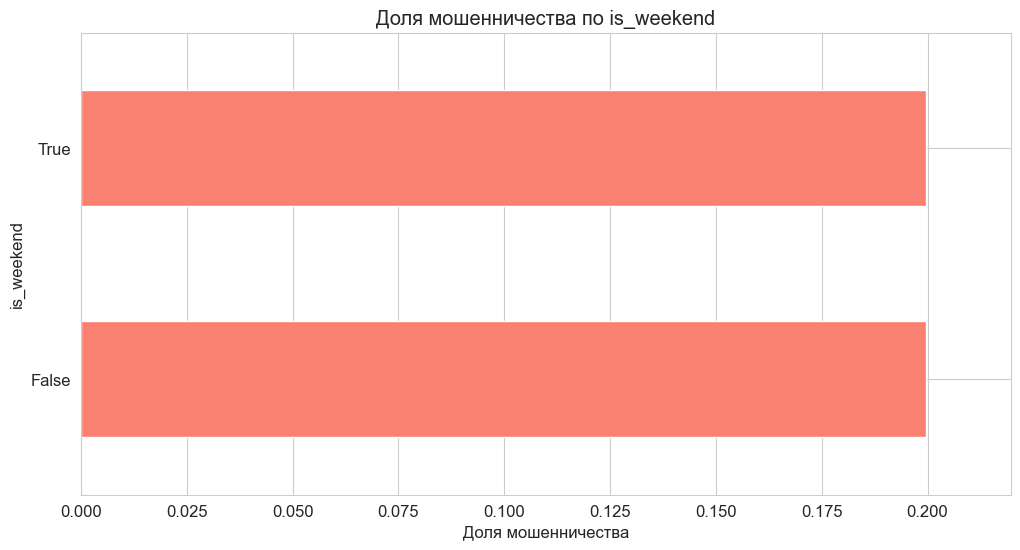

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Предполагаем, что df_transactions и df_exchange_rates уже загружены и обработаны
# (т.е. ты уже выполнил предыдущие ячейки и у тебя есть развернутая last_hour_activity и колонка date)

# --- 5. Анализ распределения мошеннических/немошеннических транзакций ---
print("\n--- Баланс классов 'is_fraud' ---")
fraud_counts = df_transactions['is_fraud'].value_counts()
fraud_percentages = df_transactions['is_fraud'].value_counts(normalize=True) * 100

print(f"Количество мошеннических транзакций (True): {fraud_counts.get(True, 0)}")
print(f"Количество легитимных транзакций (False): {fraud_counts.get(False, 0)}")
print(f"Доля мошеннических транзакций: {fraud_percentages.get(True, 0):.4f}%")
print(f"Доля легитимных транзакций: {fraud_percentages.get(False, 0):.4f}%")

plt.figure(figsize=(7, 5))
sns.countplot(x='is_fraud', data=df_transactions, palette='viridis')
plt.title('Распределение класса is_fraud')
plt.xlabel('Мошенничество (False = Нет, True = Да)')
plt.ylabel('Количество транзакций')
plt.xticks(ticks=[0, 1], labels=['Легитимная', 'Мошенническая'])
plt.show()

# --- 6. Анализ мошенничества по категориальным признакам (Исправленная версия) ---
print("\n--- Анализ мошенничества по основным категориальным признакам ---")

categorical_cols = ['vendor_category', 'vendor_type', 'currency', 'country',
                    'city_size', 'card_type', 'device', 'channel',
                    'is_card_present', 'is_outside_home_country', 'is_high_risk_vendor', 'is_weekend']

for col in categorical_cols:
    if col in df_transactions.columns:
        print(f"\nАнализ по признаку: {col}")
        
        # Группировка по признаку и is_fraud, затем подсчет и нормализация для получения доли мошенничества
        fraud_rate_by_cat = df_transactions.groupby(col)['is_fraud'].mean().sort_values(ascending=False)
        print("Доля мошенничества по категориям:")
        print(fraud_rate_by_cat)

        plt.figure(figsize=(12, 6))
        # Создаем countplot, чтобы увидеть общее распределение транзакций и их разделение по мошенничеству
        sns.countplot(y=col, hue='is_fraud', data=df_transactions, order=df_transactions[col].value_counts().index, palette='coolwarm')
        plt.title(f'Распределение транзакций по {col} и статусу мошенничества')
        plt.xlabel('Количество транзакций')
        plt.ylabel(col)
        plt.show()

        # Визуализация доли мошенничества для каждой категории (более наглядная)
        plt.figure(figsize=(12, 6))
        fraud_rate_by_cat.plot(kind='barh', color='salmon')
        plt.title(f'Доля мошенничества по {col}')
        plt.xlabel('Доля мошенничества')
        plt.ylabel(col)
        plt.gca().invert_yaxis() # Для лучшей читаемости, чтобы самое высокое значение было сверху
        plt.xlim(0, max(fraud_rate_by_cat.max() * 1.1, 0.01)) # Устанавливаем лимит x-axis
        plt.show()


--- Анализ числовых признаков по статусу мошенничества ---

Распределение amount для мошеннических и немошеннических транзакций:
              count           mean            std    min      25%      50%  \
is_fraud                                                                     
False     5989047.0   30242.538284   87656.818774  17.95  368.220   903.51   
True      1494719.0  118773.589871  347542.933086   0.01  295.585  5626.06   

               75%         max  
is_fraud                        
False     14535.93  1240629.47  
True      63556.20  6253152.62  


C:\Users\georg\AppData\Local\Temp\ipykernel_24840\2878918434.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_fraud', y=col, data=df_transactions, palette='pastel')


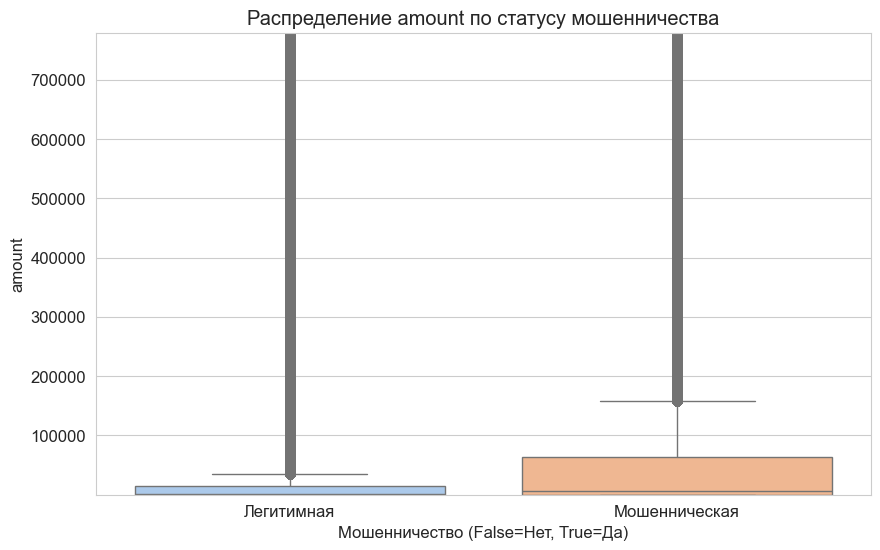


Распределение last_hour_activity_num_transactions для мошеннических и немошеннических транзакций:
              count        mean         std  min    25%    50%    75%     max
is_fraud                                                                     
False     5989047.0  408.262533  390.672430  0.0  105.0  292.0  605.0  3962.0
True      1494719.0  412.670479  392.771128  0.0  108.0  296.0  611.0  3854.0


C:\Users\georg\AppData\Local\Temp\ipykernel_24840\2878918434.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_fraud', y=col, data=df_transactions, palette='pastel')


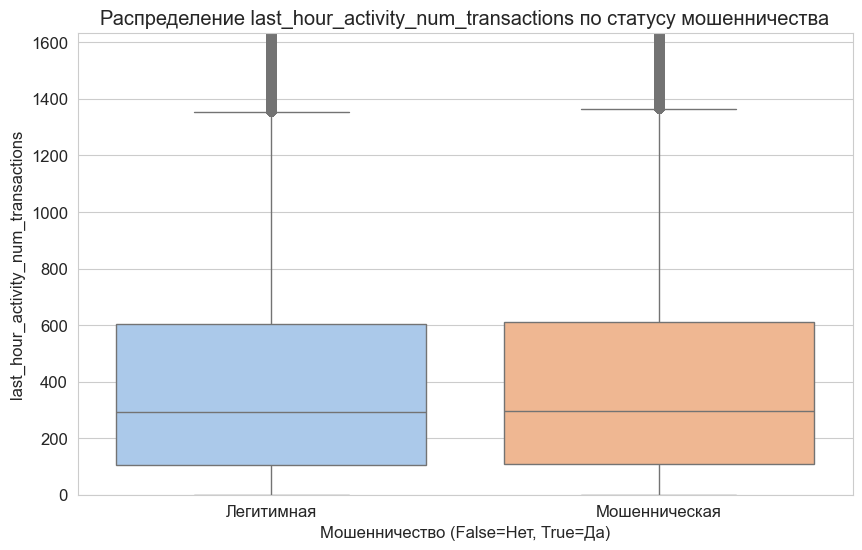


Распределение last_hour_activity_total_amount для мошеннических и немошеннических транзакций:
              count          mean           std        min           25%  \
is_fraud                                                                   
False     5989047.0  1.985784e+07  3.560844e+07  22.205646  3.323374e+06   
True      1494719.0  2.015500e+07  3.585936e+07   0.014542  3.544052e+06   

                   50%           75%           max  
is_fraud                                            
False     1.012947e+07  2.267859e+07  1.072915e+09  
True      1.037572e+07  2.296117e+07  1.038709e+09  


C:\Users\georg\AppData\Local\Temp\ipykernel_24840\2878918434.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_fraud', y=col, data=df_transactions, palette='pastel')


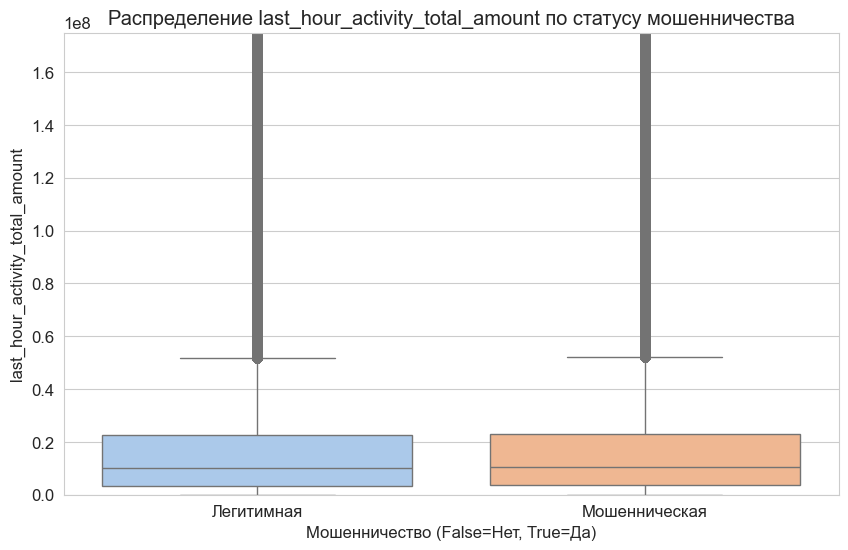


Распределение last_hour_activity_unique_merchants для мошеннических и немошеннических транзакций:
              count       mean        std  min   25%   50%    75%    max
is_fraud                                                                
False     5989047.0  79.916723  30.571651  0.0  63.0  95.0  104.0  105.0
True      1494719.0  80.445120  30.070122  0.0  64.0  95.0  104.0  105.0


C:\Users\georg\AppData\Local\Temp\ipykernel_24840\2878918434.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_fraud', y=col, data=df_transactions, palette='pastel')


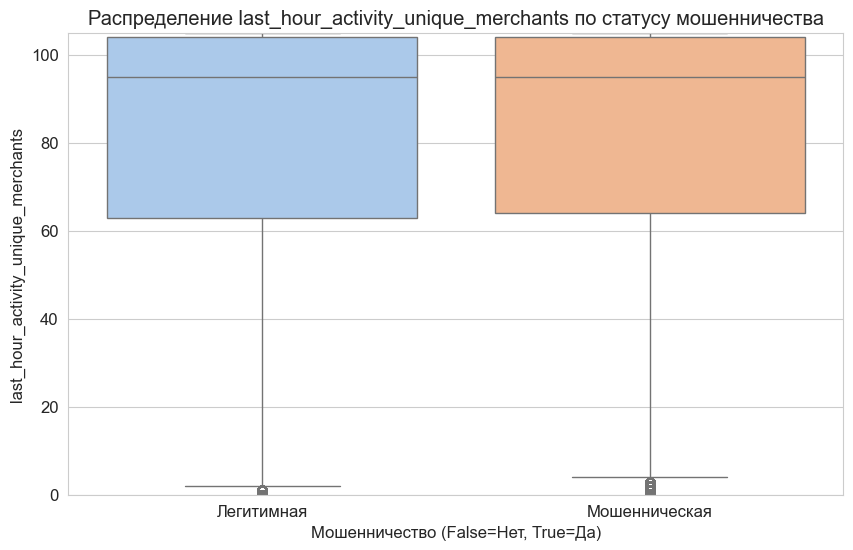


Распределение last_hour_activity_unique_countries для мошеннических и немошеннических транзакций:
              count       mean       std  min   25%   50%   75%   max
is_fraud                                                             
False     5989047.0  10.650769  2.635341  0.0  11.0  12.0  12.0  12.0
True      1494719.0  10.710001  2.545636  0.0  11.0  12.0  12.0  12.0


C:\Users\georg\AppData\Local\Temp\ipykernel_24840\2878918434.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_fraud', y=col, data=df_transactions, palette='pastel')


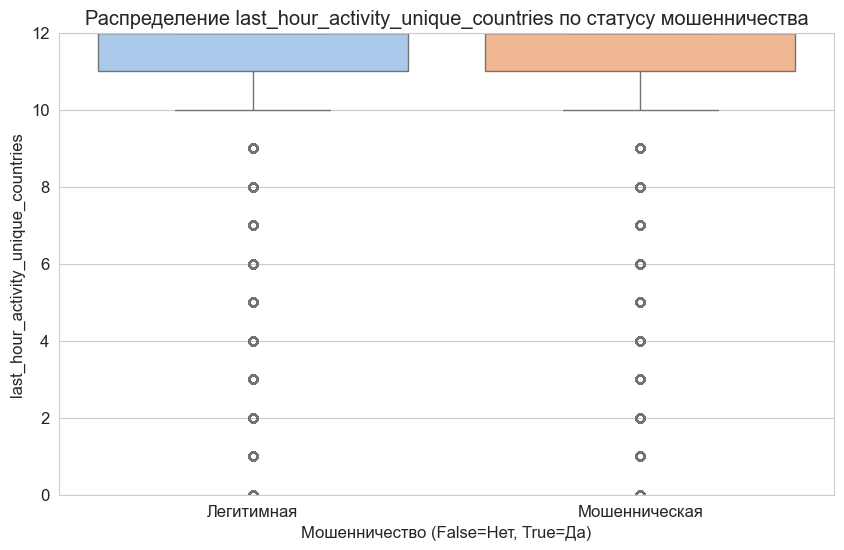


Распределение last_hour_activity_max_single_amount для мошеннических и немошеннических транзакций:
              count          mean           std        min            25%  \
is_fraud                                                                    
False     5989047.0  1.719987e+06  1.399345e+06  21.782470  796760.541495   
True      1494719.0  1.752255e+06  1.393929e+06   0.014542  822698.831406   

                   50%           75%           max  
is_fraud                                            
False     1.229527e+06  2.287102e+06  6.253153e+06  
True      1.267038e+06  2.333986e+06  6.253153e+06  


C:\Users\georg\AppData\Local\Temp\ipykernel_24840\2878918434.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_fraud', y=col, data=df_transactions, palette='pastel')


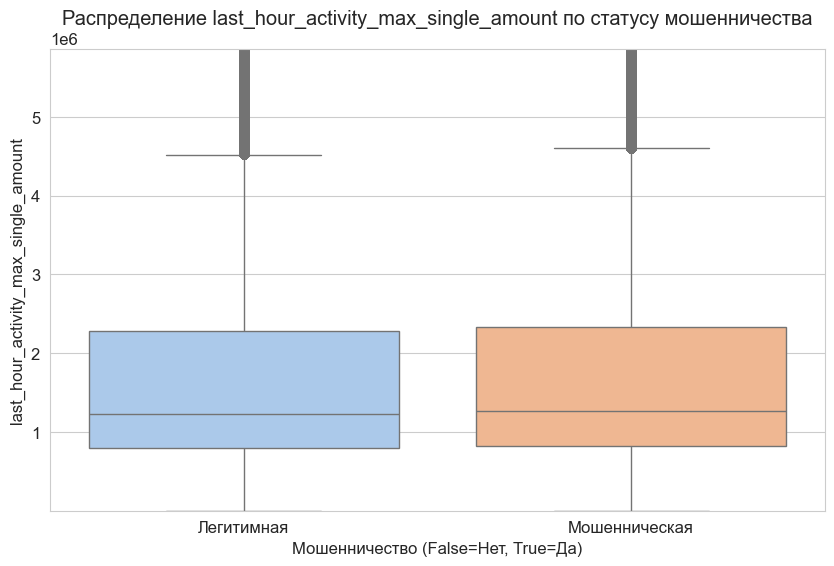

In [3]:
# --- 7. Анализ числовых признаков по статусу мошенничества ---
print("\n--- Анализ числовых признаков по статусу мошенничества ---")

numerical_cols = ['amount',
                  'last_hour_activity_num_transactions',
                  'last_hour_activity_total_amount',
                  'last_hour_activity_unique_merchants',
                  'last_hour_activity_unique_countries',
                  'last_hour_activity_max_single_amount']

for col in numerical_cols:
    if col in df_transactions.columns:
        print(f"\nРаспределение {col} для мошеннических и немошеннических транзакций:")
        print(df_transactions.groupby('is_fraud')[col].describe())

        plt.figure(figsize=(10, 6))
        sns.boxplot(x='is_fraud', y=col, data=df_transactions, palette='pastel')
        plt.title(f'Распределение {col} по статусу мошенничества')
        plt.xlabel('Мошенничество (False=Нет, True=Да)')
        plt.ylabel(col)
        # Ограничим ось Y, чтобы выбросы не сильно растягивали график,
        # но при этом сохраняли видимость основных распределений.
        # Например, до 99-го перцентиля общей выборки.
        q99 = df_transactions[col].quantile(0.99)
        plt.ylim(df_transactions[col].min(), q99)
        plt.xticks(ticks=[0, 1], labels=['Легитимная', 'Мошенническая'])
        plt.show()

In [4]:
print(df_transactions.columns)

Index(['transaction_id', 'customer_id', 'card_number', 'timestamp',
       'vendor_category', 'vendor_type', 'vendor', 'amount', 'currency',
       'country', 'city', 'city_size', 'card_type', 'is_card_present',
       'device', 'channel', 'device_fingerprint', 'ip_address',
       'is_outside_home_country', 'is_high_risk_vendor', 'is_weekend',
       'is_fraud', 'last_hour_activity_num_transactions',
       'last_hour_activity_total_amount',
       'last_hour_activity_unique_merchants',
       'last_hour_activity_unique_countries',
       'last_hour_activity_max_single_amount', 'date'],
      dtype='object')


In [5]:
import pandas as pd

# Загрузка данных о транзакциях
df_transactions = pd.read_parquet('transaction_fraud_data.parquet')

# Загрузка исторических курсов валют
df_exchange_rates = pd.read_parquet('historical_currency_exchange.parquet')

# Преобразование столбца 'timestamp' в datetime
df_transactions['timestamp'] = pd.to_datetime(df_transactions['timestamp'])

# --- ИСПРАВЛЕНИЕ ЗДЕСЬ: Нормализуем timestamp до даты ---
df_transactions['transaction_date_only'] = df_transactions['timestamp'].dt.normalize()
# --- ИСПРАВЛЕНИЕ ЗАКОНЧЕНО ---

df_exchange_rates['date'] = pd.to_datetime(df_exchange_rates['date'])

# Объединяем транзакции с курсами валют по дате
df_transactions = pd.merge(
    df_transactions,
    df_exchange_rates,
    left_on='transaction_date_only', # --- ИСПРАВЛЕНИЕ ЗДЕСЬ: используем новую колонку ---
    right_on='date',
    how='left'
)

# Удаляем дублирующуюся колонку 'date' из df_exchange_rates
df_transactions = df_transactions.drop(columns=['date'])

# Создаем новую колонку для суммы в USD
df_transactions['amount_usd'] = df_transactions['amount']

# Итерируем по уникальным валютам в данных транзакций (кроме USD)
for currency_code in df_transactions['currency'].unique():
    if currency_code != 'USD':
        mask = df_transactions['currency'] == currency_code
        
        # Убедимся, что колонка с курсом существует и не пуста для данной валюты
        if currency_code in df_transactions.columns:
            # Деление только там, где курс не NaN
            # Добавим условие, чтобы делить только если соответствующий курс не NaN
            conversion_mask = mask & df_transactions[currency_code].notna()
            df_transactions.loc[conversion_mask, 'amount_usd'] = \
                df_transactions.loc[conversion_mask, 'amount'] / df_transactions.loc[conversion_mask, currency_code]
        else:
            print(f"Предупреждение: Колонка с курсом для валюты {currency_code} не найдена после объединения.")

# Теперь df_transactions содержит новый столбец 'amount_usd'.
# Проверим первые несколько строк:
print("Первые 5 строк с колонками 'timestamp', 'currency', 'amount', 'amount_usd':")
print(df_transactions[['timestamp', 'currency', 'amount', 'amount_usd']].head())

# Проверим количество пропущенных значений в новом столбце:
print("\nКоличество пропущенных значений в 'amount_usd':")
print(df_transactions['amount_usd'].isnull().sum())

# Удалим временный столбец
df_transactions = df_transactions.drop(columns=['transaction_date_only'])

Первые 5 строк с колонками 'timestamp', 'currency', 'amount', 'amount_usd':
                   timestamp currency     amount  amount_usd
0 2024-09-30 00:00:01.034820      GBP     294.87  394.658011
1 2024-09-30 00:00:01.764464      BRL    3368.97  619.905757
2 2024-09-30 00:00:02.273762      JPY  102582.38  719.506409
3 2024-09-30 00:00:02.297466      AUD     630.60  436.808287
4 2024-09-30 00:00:02.544063      NGN  724949.27  434.430069

Количество пропущенных значений в 'amount_usd':
0


In [6]:
print("Первые 5 строк с колонками 'timestamp', 'currency', 'amount', 'amount_usd':")
print(df_transactions[['timestamp', 'currency', 'amount', 'amount_usd']].head())


print("\nКоличество пропущенных значений в 'amount_usd':")
print(df_transactions['amount_usd'].isnull().sum())

print(df_transactions.columns)

Первые 5 строк с колонками 'timestamp', 'currency', 'amount', 'amount_usd':
                   timestamp currency     amount  amount_usd
0 2024-09-30 00:00:01.034820      GBP     294.87  394.658011
1 2024-09-30 00:00:01.764464      BRL    3368.97  619.905757
2 2024-09-30 00:00:02.273762      JPY  102582.38  719.506409
3 2024-09-30 00:00:02.297466      AUD     630.60  436.808287
4 2024-09-30 00:00:02.544063      NGN  724949.27  434.430069

Количество пропущенных значений в 'amount_usd':
0
Index(['transaction_id', 'customer_id', 'card_number', 'timestamp',
       'vendor_category', 'vendor_type', 'vendor', 'amount', 'currency',
       'country', 'city', 'city_size', 'card_type', 'is_card_present',
       'device', 'channel', 'device_fingerprint', 'ip_address',
       'is_outside_home_country', 'is_high_risk_vendor', 'is_weekend',
       'last_hour_activity', 'is_fraud', 'AUD', 'BRL', 'CAD', 'EUR', 'GBP',
       'JPY', 'MXN', 'NGN', 'RUB', 'SGD', 'USD', 'amount_usd'],
      dtype='object'

In [7]:
import pandas as pd

# --- Шаг 1: Загрузка данных ---
print("Загрузка данных...")
df_transactions = pd.read_parquet('transaction_fraud_data.parquet')
df_exchange_rates = pd.read_parquet('historical_currency_exchange.parquet')
print("Данные загружены.")

# --- Шаг 2: Подготовка столбцов даты/времени ---
print("Преобразование столбцов даты/времени...")
df_transactions['timestamp'] = pd.to_datetime(df_transactions['timestamp'])
# Нормализуем timestamp до даты для объединения с курсами валют
df_transactions['transaction_date_only'] = df_transactions['timestamp'].dt.normalize()
df_exchange_rates['date'] = pd.to_datetime(df_exchange_rates['date'])
print("Столбцы даты/времени обработаны.")

# --- Шаг 3: Объединение с курсами валют ---
print("Объединение с курсами валют...")
df_transactions = pd.merge(
    df_transactions,
    df_exchange_rates,
    left_on='transaction_date_only',
    right_on='date',
    how='left'
)
# Удаляем дублирующуюся колонку 'date' из df_exchange_rates и временный столбец даты
df_transactions = df_transactions.drop(columns=['date', 'transaction_date_only'])
print("Данные объединены с курсами валют.")

# --- Шаг 4: Конвертация сумм транзакций в USD ---
print("Конвертация сумм транзакций в USD...")
df_transactions['amount_usd'] = df_transactions['amount']

for currency_code in df_transactions['currency'].unique():
    if currency_code != 'USD':
        mask = df_transactions['currency'] == currency_code
        if currency_code in df_transactions.columns:
            conversion_mask = mask & df_transactions[currency_code].notna()
            df_transactions.loc[conversion_mask, 'amount_usd'] = \
                df_transactions.loc[conversion_mask, 'amount'] / df_transactions.loc[conversion_mask, currency_code]
        else:
            print(f"Предупреждение: Колонка с курсом для валюты {currency_code} не найдена после объединения.")
print("Конвертация в USD завершена.")

# Проверка конвертации amount_usd
print("\n--- Проверка 'amount_usd' ---")
print("Первые 5 строк с колонками 'timestamp', 'currency', 'amount', 'amount_usd':")
print(df_transactions[['timestamp', 'currency', 'amount', 'amount_usd']].head())
print("\nКоличество пропущенных значений в 'amount_usd':")
print(df_transactions['amount_usd'].isnull().sum())
print("----------------------------")

# --- Шаг 5: Распаковка 'last_hour_activity' (УЛУЧШЕННАЯ ВЕРСИЯ) ---
print("\nРаспаковка столбца 'last_hour_activity'...")
# Преобразуем столбец в список словарей и создаем из него новый DataFrame
last_hour_activity_data = df_transactions['last_hour_activity'].tolist()
last_hour_activity_df = pd.DataFrame(last_hour_activity_data)

# Объединяем эти новые столбцы обратно с основным датафреймом df_transactions
# Используем .join вместо concat для сохранения индекса и предотвращения дублирования
df_transactions = df_transactions.join(last_hour_activity_df)

# Удаляем исходный вложенный столбец 'last_hour_activity'
df_transactions = df_transactions.drop(columns=['last_hour_activity'])
print("Столбец 'last_hour_activity' распакован.")

# Проверка распаковки last_hour_activity
print("\n--- Проверка распаковки 'last_hour_activity' ---")
print("Первые 5 строк с новыми колонками из last_hour_activity:")
print(df_transactions[[
    'num_transactions', 'total_amount', 'unique_merchants',
    'unique_countries', 'max_single_amount'
]].head())
print("\nКоличество пропущенных значений в новых колонках 'last_hour_activity':")
print(df_transactions[[
    'num_transactions', 'total_amount', 'unique_merchants',
    'unique_countries', 'max_single_amount'
]].isnull().sum())
print("---------------------------------------------")

print("\nПодготовка данных завершена! Датафрейм df_transactions теперь содержит 'amount_usd' и распакованные признаки активности.")

# Теперь df_transactions готов к дальнейшему анализу или построению модели.
# Например, вы можете вывести информацию о датафрейме:
# print("\nИнформация о датафрейме после обработки:")
# print(df_transactions.info())

Загрузка данных...
Данные загружены.
Преобразование столбцов даты/времени...
Столбцы даты/времени обработаны.
Объединение с курсами валют...
Данные объединены с курсами валют.
Конвертация сумм транзакций в USD...
Конвертация в USD завершена.

--- Проверка 'amount_usd' ---
Первые 5 строк с колонками 'timestamp', 'currency', 'amount', 'amount_usd':
                   timestamp currency     amount  amount_usd
0 2024-09-30 00:00:01.034820      GBP     294.87  394.658011
1 2024-09-30 00:00:01.764464      BRL    3368.97  619.905757
2 2024-09-30 00:00:02.273762      JPY  102582.38  719.506409
3 2024-09-30 00:00:02.297466      AUD     630.60  436.808287
4 2024-09-30 00:00:02.544063      NGN  724949.27  434.430069

Количество пропущенных значений в 'amount_usd':
0
----------------------------

Распаковка столбца 'last_hour_activity'...
Столбец 'last_hour_activity' распакован.

--- Проверка распаковки 'last_hour_activity' ---
Первые 5 строк с новыми колонками из last_hour_activity:
   num_transa

In [8]:
import pandas as pd

# Предполагается, что ваш df_transactions - это результат выполнения предыдущего скрипта

# Определяем целевую переменную
y = df_transactions['is_fraud']

# Определяем список признаков
# Сначала собираем все колонки, которые хотим включить
feature_columns = [
    # Числовые признаки
    'amount_usd',
    'num_transactions',
    'total_amount',
    'unique_merchants',
    'unique_countries',
    'max_single_amount',

    # Категориальные признаки
    'vendor_category',
    'vendor_type',
    'currency',
    'country',
    'city',
    'city_size',
    'card_type',
    'device',
    'channel',

    # Булевы признаки
    'is_card_present',
    'is_outside_home_country',
    'is_high_risk_vendor',
    'is_weekend'
]

# Создаем DataFrame с признаками
X = df_transactions[feature_columns]

# Проверяем первые 5 строк X и Y
print("Признаки (X) - первые 5 строк:")
print(X.head())

print("\nЦелевая переменная (Y) - первые 5 значений:")
print(y.head())

print("\nРазмерность X:", X.shape)
print("Размерность Y:", y.shape)

# Проверим типы данных, это важно для дальнейшей предобработки
print("\nТипы данных в X:")
print(X.dtypes)

Признаки (X) - первые 5 строк:
   amount_usd  num_transactions  total_amount  unique_merchants  \
0  394.658011              1197  3.349856e+07               105   
1  619.905757               509  2.011476e+07               100   
2  719.506409               332  3.916385e+07                97   
3  436.808287               764  2.201260e+07               105   
4  434.430069               218  4.827636e+06                88   

   unique_countries  max_single_amount vendor_category vendor_type currency  \
0                12       1.925481e+06      Restaurant   fast_food      GBP   
1                12       5.149117e+06   Entertainment      gaming      BRL   
2                12       1.852242e+06         Grocery    physical      JPY   
3                12       2.055798e+06             Gas       major      AUD   
4                12       1.157231e+06      Healthcare     medical      NGN   

     country          city city_size        card_type   device channel  \
0         UK  Unk

In [9]:
from sklearn.model_selection import train_test_split

# --- Сначала отделим тестовую выборку (например, 20% данных) ---
# 'stratify=y' гарантирует сохранение пропорций классов
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Затем разделим оставшиеся данные на обучающую и валидационную выборки ---
# Например, 25% от X_train_val (что составит 20% от исходного X)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)

# --- Проверим размерности и распределение классов в каждой выборке ---
print("Размерность X_train:", X_train.shape, " | Размерность y_train:", y_train.shape)
print("Размерность X_val:", X_val.shape, "   | Размерность y_val:", y_val.shape)
print("Размерность X_test:", X_test.shape, "  | Размерность y_test:", y_test.shape)

print("\nРаспределение класса 'is_fraud' в обучающей выборке:")
print(y_train.value_counts(normalize=True))
print("\nРаспределение класса 'is_fraud' в валидационной выборке:")
print(y_val.value_counts(normalize=True))
print("\nРаспределение класса 'is_fraud' в тестовой выборке:")
print(y_test.value_counts(normalize=True))

Размерность X_train: (4490259, 19)  | Размерность y_train: (4490259,)
Размерность X_val: (1496753, 19)    | Размерность y_val: (1496753,)
Размерность X_test: (1496754, 19)   | Размерность y_test: (1496754,)

Распределение класса 'is_fraud' в обучающей выборке:
is_fraud
False    0.800272
True     0.199728
Name: proportion, dtype: float64

Распределение класса 'is_fraud' в валидационной выборке:
is_fraud
False    0.800272
True     0.199728
Name: proportion, dtype: float64

Распределение класса 'is_fraud' в тестовой выборке:
is_fraud
False    0.800272
True     0.199728
Name: proportion, dtype: float64


In [10]:
import pandas as pd
import numpy as np # Добавляем импорт numpy
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.sparse import hstack

# Предполагается, что X_train, X_val, X_test, y_train, y_val, y_test уже определены.

# Определяем группы признаков
numerical_features = [
    'amount_usd', 'num_transactions', 'total_amount',
    'unique_merchants', 'unique_countries', 'max_single_amount'
]

true_categorical_features = [
    'vendor_category', 'vendor_type', 'currency',
    'city_size', 'card_type', 'device', 'channel'
]

boolean_features = [
    'is_card_present', 'is_outside_home_country', 'is_high_risk_vendor', 'is_weekend'
]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), true_categorical_features)
    ],
    remainder='drop'
)

# --- Шаг 1: Извлечение и преобразование булевых признаков (ТЕПЕРЬ В int8) ---
print("Извлечение и преобразование булевых признаков (в int8)...")
X_train_bool = X_train[boolean_features].astype(np.int8)
X_val_bool = X_val[boolean_features].astype(np.int8)
X_test_bool = X_test[boolean_features].astype(np.int8)
print("Булевы признаки преобразованы в int8.")

# --- Шаг 2: Обучение и применение препроцессора к остальным признакам ---
X_train_for_preprocessor = X_train.drop(columns=boolean_features + ['country', 'city'])
X_val_for_preprocessor = X_val.drop(columns=boolean_features + ['country', 'city'])
X_test_for_preprocessor = X_test.drop(columns=boolean_features + ['country', 'city'])

print("Обучение препроцессора на X_train (без булевых, city, country)...")
preprocessor.fit(X_train_for_preprocessor)

print("Преобразование X_train...")
X_train_processed_temp = preprocessor.transform(X_train_for_preprocessor)
print("Преобразование X_val...")
X_val_processed_temp = preprocessor.transform(X_val_for_preprocessor)
print("Преобразование X_test...")
X_test_processed_temp = preprocessor.transform(X_test_for_preprocessor)
print("Препроцессинг числовых и основных категориальных признаков завершен.")


# --- Шаг 3: Объединение преобразованных признаков с булевыми ---
print("Объединение преобразованных признаков с булевыми...")
X_train_processed = hstack([X_train_processed_temp, X_train_bool]).tocsr()
X_val_processed = hstack([X_val_processed_temp, X_val_bool]).tocsr()
X_test_processed = hstack([X_test_processed_temp, X_test_bool]).tocsr()
print("Объединение завершено.")


# Проверим размерность преобразованных данных
print("\nРазмерность X_train_processed:", X_train_processed.shape)
print("Размерность X_val_processed:", X_val_processed.shape)
print("Размерность X_test_processed:", X_test_processed.shape)

Извлечение и преобразование булевых признаков (в int8)...
Булевы признаки преобразованы в int8.
Обучение препроцессора на X_train (без булевых, city, country)...
Преобразование X_train...
Преобразование X_val...
Преобразование X_test...
Препроцессинг числовых и основных категориальных признаков завершен.
Объединение преобразованных признаков с булевыми...
Объединение завершено.

Размерность X_train_processed: (4490259, 65)
Размерность X_val_processed: (1496753, 65)
Размерность X_test_processed: (1496754, 65)


In [12]:
import lightgbm as lgb
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
import numpy as np

# --- 1. Выбор и обучение модели LightGBM ---
print("Инициализация и обучение модели LightGBM...")

# LightGBM хорошо работает с несбалансированными классами,
# используя параметр 'scale_pos_weight' или 'is_unbalance=True'.
# 'scale_pos_weight' более гибок и может быть рассчитан как (количество негативных классов / количество позитивных классов).
# Давайте рассчитаем его:
scale_pos_weight_value = (y_train == False).sum() / (y_train == True).sum()
print(f"Значение scale_pos_weight: {scale_pos_weight_value:.2f}")

lgbm_model = lgb.LGBMClassifier(
    objective='binary',               # Двоичная классификация
    metric='auc',                     # Метрика для оптимизации - ROC AUC
    n_estimators=1000,                # Количество бустинговых раундов (деревьев)
    learning_rate=0.05,               # Скорость обучения
    num_leaves=31,                    # Максимальное количество листьев в дереве
    max_depth=-1,                     # Без ограничения по глубине
    min_child_samples=20,             # Минимальное количество данных в листе
    subsample=0.8,                    # Доля выборки для каждого дерева
    colsample_bytree=0.8,             # Доля признаков для каждого дерева
    random_state=42,                  # Для воспроизводимости
    n_jobs=-1,                        # Использовать все доступные ядра CPU
    scale_pos_weight=scale_pos_weight_value, # Для обработки дисбаланса классов
    # Параметры для ранней остановки
    # Обучаем с ранней остановкой, чтобы предотвратить переобучение.
    # Это потребует передачи валидационной выборки.
)

# Обучаем модель с ранней остановкой
lgbm_model.fit(X_train_processed, y_train,
               eval_set=[(X_val_processed, y_val)],
               eval_metric='auc',
               callbacks=[lgb.early_stopping(100, verbose=True)]) # Остановка, если AUC не улучшается в течение 100 итераций

print("Обучение модели завершено.")

# --- 2. Оценка модели на валидационной выборке ---
print("\n--- Оценка модели на валидационной выборке ---")
y_val_pred = lgbm_model.predict(X_val_processed)
y_val_proba = lgbm_model.predict_proba(X_val_processed)[:, 1] # Вероятности для положительного класса (мошенничество)

print("Отчет по классификации (валидация):")
print(classification_report(y_val, y_val_pred))

roc_auc_val = roc_auc_score(y_val, y_val_proba)
print(f"ROC AUC (валидация): {roc_auc_val:.4f}")

# Также полезно посмотреть Precision-Recall AUC (PR AUC), особенно для несбалансированных данных
precision, recall, _ = precision_recall_curve(y_val, y_val_proba)
pr_auc_val = auc(recall, precision)
print(f"Precision-Recall AUC (валидация): {pr_auc_val:.4f}")

# --- 3. Оценка модели на тестовой выборке (Финальная оценка) ---
# Эта оценка должна быть сделана только ОДИН раз, чтобы получить несмещенную оценку производительности.
print("\n--- Оценка модели на ТЕСТОВОЙ выборке (финальная) ---")
y_test_pred = lgbm_model.predict(X_test_processed)
y_test_proba = lgbm_model.predict_proba(X_test_processed)[:, 1]

print("Отчет по классификации (тест):")
print(classification_report(y_test, y_test_pred))

roc_auc_test = roc_auc_score(y_test, y_test_proba)
print(f"ROC AUC (тест): {roc_auc_test:.4f}")

precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_proba)
pr_auc_test = auc(recall_test, precision_test)
print(f"Precision-Recall AUC (тест): {pr_auc_test:.4f}")

print("\nМоделирование завершено. Результаты представлены выше.")

Инициализация и обучение модели LightGBM...
Значение scale_pos_weight: 4.01
[LightGBM] [Info] Number of positive: 896831, number of negative: 3593428
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.226688 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1259
[LightGBM] [Info] Number of data points in the train set: 4490259, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.199728 -> initscore=-1.387994
[LightGBM] [Info] Start training from score -1.387994
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[993]	valid_0's auc: 0.997404
Обучение модели завершено.

--- Оценка модели на валидационной выборке ---


C:\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Отчет по классификации (валидация):
              precision    recall  f1-score   support

       False       0.99      0.98      0.99   1197809
        True       0.91      0.97      0.94    298944

    accuracy                           0.98   1496753
   macro avg       0.95      0.97      0.96   1496753
weighted avg       0.98      0.98      0.98   1496753

ROC AUC (валидация): 0.9974
Precision-Recall AUC (валидация): 0.9920

--- Оценка модели на ТЕСТОВОЙ выборке (финальная) ---


C:\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Отчет по классификации (тест):
              precision    recall  f1-score   support

       False       0.99      0.98      0.99   1197810
        True       0.91      0.97      0.94    298944

    accuracy                           0.98   1496754
   macro avg       0.95      0.98      0.96   1496754
weighted avg       0.98      0.98      0.98   1496754

ROC AUC (тест): 0.9974
Precision-Recall AUC (тест): 0.9921

Моделирование завершено. Результаты представлены выше.



Анализ важности признаков...

Топ-20 наиболее важных признаков:
                      Feature  Importance
0                  amount_usd        7181
5           max_single_amount        2280
1            num_transactions        1302
2                total_amount        1252
47  card_type_Platinum Credit        1088
38               currency_NGN        1047
45      card_type_Basic Debit         778
62    is_outside_home_country         761
39               currency_RUB         670
3            unique_merchants         613
46      card_type_Gold Credit         594
12     vendor_category_Retail         555
16         vendor_type_casual         542
44     card_type_Basic Credit         527
30      vendor_type_transport         517
36               currency_JPY         509
24         vendor_type_online         506
28      vendor_type_streaming         483
9     vendor_category_Grocery         481
13     vendor_category_Travel         477


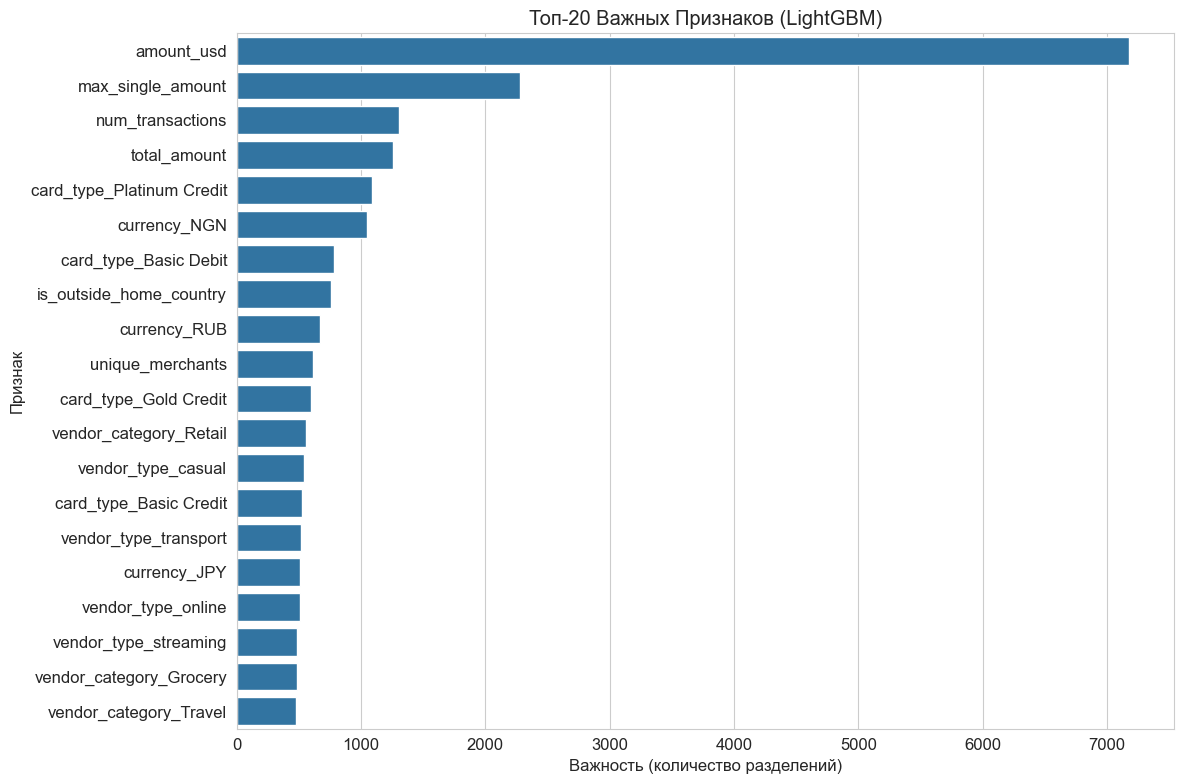


Анализ важности признаков завершен.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Предполагается, что lgbm_model уже обучена,
# а `preprocessor` был использован для преобразования данных.

print("\nАнализ важности признаков...")

# Получаем важность признаков из обученной модели
feature_importances = lgbm_model.feature_importances_

# Получаем названия признаков после One-Hot Encoding и масштабирования.
# OneHotEncoder создает много новых столбцов, поэтому нужно собрать все имена.

# Сначала получаем имена числовых признаков
numerical_feature_names = numerical_features # Эти имена остались без изменений

# Затем получаем имена категориальных признаков после One-Hot Encoding
# ColumnTransformer создает имена вида 'cat__<название_столбца>_<значение>'.
# Мы обращаемся к трансформеру 'cat' в препроцессоре.
one_hot_encoder = preprocessor.named_transformers_['cat']
categorical_feature_names = one_hot_encoder.get_feature_names_out(true_categorical_features)

# Имена булевых признаков, которые мы добавили отдельно
boolean_feature_names = boolean_features

# Объединяем все имена признаков в один список
# Важно, чтобы порядок совпадал с порядком столбцов в X_processed
# Numerical features идут первыми, затем One-Hot encoded, затем булевы.
all_feature_names = list(numerical_feature_names) + list(categorical_feature_names) + list(boolean_feature_names)


# Создаем DataFrame для удобства анализа и сортировки
importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
})

# Сортируем признаки по важности в убывающем порядке
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Выводим топ-20 наиболее важных признаков
print("\nТоп-20 наиболее важных признаков:")
print(importance_df.head(20))

# Визуализация важности признаков (топ-20)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Топ-20 Важных Признаков (LightGBM)')
plt.xlabel('Важность (количество разделений)')
plt.ylabel('Признак')
plt.tight_layout()
plt.show()

print("\nАнализ важности признаков завершен.")

In [14]:
import joblib
import os # Для работы с путями файлов

# Имя файла для сохранения модели
model_filename = 'lgbm_fraud_detection_model.joblib'

print(f"Сохранение модели в файл: {model_filename}...")

try:
    # Сохраняем обученную модель
    joblib.dump(lgbm_model, model_filename)
    print(f"Модель успешно сохранена по пути: {os.path.abspath(model_filename)}")
except Exception as e:
    print(f"Произошла ошибка при сохранении модели: {e}")

print("\nЧтобы загрузить модель обратно, вы можете использовать следующий код:")
print(f"import joblib")
print(f"loaded_model = joblib.load('{model_filename}')")
print("Теперь вы можете использовать loaded_model для предсказаний.")

Сохранение модели в файл: lgbm_fraud_detection_model.joblib...
Модель успешно сохранена по пути: D:\PythonProjects\pythonProject\pythonProject4\fraud_detection_analysis\lgbm_fraud_detection_model.joblib

Чтобы загрузить модель обратно, вы можете использовать следующий код:
import joblib
loaded_model = joblib.load('lgbm_fraud_detection_model.joblib')
Теперь вы можете использовать loaded_model для предсказаний.
